In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
X, y = housing.data, housing.target
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, random_state=11)

In [4]:
stand_scale = StandardScaler()

x_train_scale = stand_scale.fit_transform(X_train)
x_valid_scale = stand_scale.transform(X_valid)
x_test_scale = stand_scale.transform(X_test)

In [5]:
print(x_train_scale.shape, y_train.shape)
print(x_valid_scale.shape, y_test.shape)
print(x_test_scale.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (5160,)
(5160, 8) (3870,)


In [6]:
# softplus: f(x) = log(1 + e^x)
customizes_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customizes_softplus([-3e5, -3e3, -3e1, 3e1, 3e3, 3e5]))

tf.Tensor(
[0.000000e+00 0.000000e+00 9.357623e-14 3.000000e+01 3.000000e+03
 3.000000e+05], shape=(6,), dtype=float32)


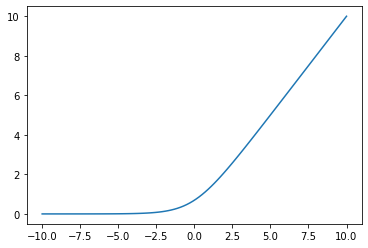

In [7]:
# plot softplus
x = np.linspace(-10.,10.,100)
y = np.log(1 + np.exp(x))
plt.plot(x, y)

In [8]:
# 自定义层次
class CustomizedDense(keras.layers.Layer):
    
    def __init__(self, units=32, activation=None):
        super(CustomizedDense, self).__init__()
        self.units = units
        self.activation = keras.layers.Activation(activation)

    def build(self, input_shape):
        # 构建所需要的参数
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='uniform',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        # 完成正向计算
        # input * w + b
        return tf.matmul(inputs, self.w) + self.b

In [9]:
model = keras.models.Sequential([
    CustomizedDense(30, activation="relu"),
    keras.layers.Dense(1, activation="softplus"),
    #customizes_softplus
])

callbacks = [keras.callbacks.EarlyStopping(min_delta=1e-3, patience=5)]

In [10]:
model.compile(optimizer=keras.optimizers.SGD(0.001), loss="mse")

In [11]:
history = model.fit(x_train_scale, y_train, 
                    validation_data=(x_valid_scale, y_valid), 
                    epochs=100, callbacks=callbacks
                   )

Epoch 1/100
363/363 [==============================] - 0s 981us/step - loss: 1.8413 - val_loss: 0.8946
Epoch 2/100
363/363 [==============================] - 0s 670us/step - loss: 0.6585 - val_loss: 0.6463
Epoch 3/100
363/363 [==============================] - 0s 717us/step - loss: 0.5917 - val_loss: 0.6252
Epoch 4/100
363/363 [==============================] - 0s 662us/step - loss: 0.5737 - val_loss: 0.6083
Epoch 5/100
363/363 [==============================] - 0s 808us/step - loss: 0.5584 - val_loss: 0.5934
Epoch 6/100
363/363 [==============================] - 0s 679us/step - loss: 0.5452 - val_loss: 0.5816
Epoch 7/100
363/363 [==============================] - 0s 679us/step - loss: 0.5345 - val_loss: 0.5698
Epoch 8/100
363/363 [==============================] - 0s 671us/step - loss: 0.5254 - val_loss: 0.5618
Epoch 9/100
363/363 [==============================] - 0s 679us/step - loss: 0.5177 - val_loss: 0.5541
Epoch 10/100
363/363 [==============================] - 0s 670us/step - l

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense (Customized (None, 30)                270       
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [13]:
def delpoy_history(history):
    pd.DataFrame(history).plot(figsize=(6,4))
    plt.grid(True)
    plt.ylim((0,1))
    plt.show()

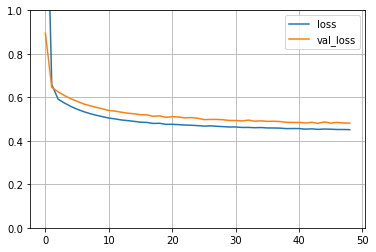

In [14]:
delpoy_history(history.history)